# Лабораторная работа 8. Алгоритмы сортировки и поиска.

# 1. Алгоритмы сортировки.

In [4]:
ary = [0,3,5,1,2,3,5,4,2,34,43,24]

# 1.1. Сортировка выбором

Алгоритм:
- найти наименьший элемент в неотсортированной части массива;
- поставить его в начало;
- сдвинуть начало неотсортированной части. 

Сложность: $O(n^2)$.

Программа:

In [5]:
def selection_sort(arrayToSort):
    a = arrayToSort
    n = len(a)
    for i in range(n):
        idxMin = i
        for j in range(i+1, n):
            if a[j] < a[idxMin]:
                idxMin = j
                tmp = a[idxMin]
                a[idxMin] = a[i]
                a[i] = tmp
    return a

Тестовый запуск:

In [6]:
print (selection_sort(ary.copy()))

[0, 2, 2, 1, 4, 3, 3, 5, 5, 24, 34, 43]


# 1.2. Сортировка вставками

Алгоритм:
- из неотсортированной части берется элемент;
- вставляется в отсортированную часть на своё мосто (в начале массива). 

Сложность: $O(n^2)$.

In [7]:
def insertion_sort(arrayToSort):
    a = arrayToSort.copy() 
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (a[j-1] > v) and (j > 0):
            a[j] = a[j-1]
            j = j - 1
        a[j] = v
    return a

In [8]:
print (insertion_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.3. Сортировка методом пузырька

Алгоритм:
- последовательно сравниваются пары элементов идущих друг за другом;
- в случае несоответствия выбранному порядку меняются местами. 

Сложность: $O(n^2)$.

In [9]:
def bubble_sort(arrayToSort):
    a = arrayToSort.copy() 
    n = len(a)
    for i in range(n,0,-1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                tmp = a[j-1]
                a[j-1] = a[j]
                a[j] = tmp
    return a

In [10]:
print (bubble_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.4. Сортировка слиянием

Алгоритм:
- сортируемый массив разбивается на две части примерно одинакового размера;
- каждая из получившихся частей сортируется отдельно, например — тем же самым алгоритмом;
- два упорядоченных массива половинного размера соединяются в один. 

Сложность: $O(n log_2 n)$.

In [11]:
def merge_sort(arrayToSort):
    if len(arrayToSort)>1:
        mid = len(arrayToSort)//2
        lefthalf = arrayToSort[:mid]
        righthalf = arrayToSort[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i, j, k = 0, 0, 0       
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                arrayToSort[k]=lefthalf[i]
                i=i+1
            else:
                arrayToSort[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            arrayToSort[k]=lefthalf[i]
            i=i+1; k=k+1
        while j<len(righthalf):
            arrayToSort[k]=righthalf[j]
            j=j+1; k=k+1

In [12]:
alist = ary.copy() 
merge_sort(alist); 
print(alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.5. Быстрая сортировка

Алгоритм:
- выбрать (опорным) элемент из массива;
- перераспределить элементы в массиве так, что элементы меньше опорного помещаются перед ним, а больше или равные после;
- применить первые два шага к подмассивам слева и справа от опорных элементов, пока в подмассивах не останется не более одного элемента. 

Сложность: Средняя $O(n log_2 n)$, Худшая $O(n^2)$.

In [13]:
def quick_sort(a, l, r):
    if (r > l):
        v, i, j = a[r], l - 1, r

        while (True):
            i, j = i + 1, j - 1                            
            while(a[i] < v): i = i + 1
            while(a[j] > v): j = j - 1
            if (i >= j): break
            a[i], a[j] = a[j], a[i]
            
        a[i], a[r] = a[r], a[i]

        quick_sort(a, l, i - 1)
        quick_sort(a, i + 1, r)

In [14]:
alist = ary.copy() 
quick_sort(alist, 0, len(alist)-1)
print (ary)

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]


# Упражнение 1. Сортировка подсчётом.

Есть ли алгоритмы сортировки со сложностью, меньшей $O(n log_2 n)$?

Да, если известны свойства ключей. Например, если число возможных вариантов значений ограничено (и невелико) можно воспользоваться сортировкой подсчётом. 

Алгоритм:
- создать массив с числом эллементов равным количеству возможным вариантов ключа, заполнить его 0;
- перебрать (пройти) сортируемое множество подсчитывая количество ключей с конкретным значением (увеличивая на 1 значения соответствующего эллемента ранее созданного массива);
- записать подряд все ненулевые эллементы получившегося массива соответствующее его значению число раз.

Сложность: $O(n+k)$, где $k$ - число вариантов ключей.

Напишите программу (функцию) реализующую данный алгоритм.

In [ ]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Сортировка подсчётом.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [16]:
import numpy as np

def counterSort(S):
    F = np.zeros(max(S) + 1)
    for si in S:
        F[si] += 1
    j = 0
    for i in range(len(F)):
        if F[i] != 0:
            for k in range(int(F[i])):
                S[j] = i
                j += 1
    return S
S = [10, 5, 14, 7, 3, 2, 18, 4, 5, 13, 6, 8]
print(counterSort(S))

[2, 3, 4, 5, 5, 6, 7, 8, 10, 13, 14, 18]


# Пример. Число $\pi$

In [5]:
from sympy import *
import numpy as np
import time
import pylab
import matplotlib.pyplot as plt

In [6]:
# Выведем заданное колличество знаков числа pi
npi=7;
print('Выведем %i знаков числа пи:\n' %npi, pi.n(npi));

Выведем 7 знаков числа пи:
 3.141593


Конвертируем дробную часть числа $\pi$ в список:

In [11]:
PI = [int(i) for i in str(pi.n(npi))[2:]]

Кроме того, можем считать цифры дробной части числа $\pi$ из файла (в котором храняться 10 000 000 его символов):

In [12]:
f = open("pi-10million.txt")  #  открываем файл
fs = f.readline(npi)          #  считываем из него npi символов
f.close()                     #  закроем файл

In [13]:
fs

'1415926'

In [14]:
Pi = [int(i) for i in fs]
print(Pi)

[1, 4, 1, 5, 9, 2, 6]


# Упражнение. Сортировка $\pi$

Сравните временную сложность всех рассмотренных алгоритмов сортировки на примере цифр числа $\pi$.

Воспользуйтесь для этого замером времени с помощью библиотеки time. Пример:

In [15]:
start_time = time.time()
PI2 = insertion_sort(PI) 
Tame=time.time()-start_time
print ('Отсортированные цифры числа пи: \n\n', PI2)
print('\n Время потраченное на сортировку составило %15.7e секунд' %(Tame))

Отсортированные цифры числа пи: 

 [1, 1, 3, 4, 5, 9]

 Время потраченное на сортировку составило   0.0000000e+00 секунд


Запишем отсортированный список в файл:

In [106]:
f1 = open("pi_sort.txt", 'w')
f1.writelines('%i' % i for i in PI2)
f1.close()

Проверим что получилось:

In [107]:
f1 = open("pi_sort.txt", 'r')
fs = f1.readlines()          #  считываем всё содержимое файла
print(fs)
f1.close()

['000000000000000000000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111112222222222222222222222222222222222222222222222222222222222233333333333333333333333333333333333333333333333333333333334444444444444444444444444444444444444444444444444444444444455555555555555555555555555555555555555555555555555556666666666666666666666666666666666666666666666666666666777777777777777777777777777777777777777788888888888888888888888888888888888888888888888888888888999999999999999999999999999999999999999999999999999999999']


Посмотрим как меняются затраты времени на сортировку вставками при увеличении числа сортируемых объектов:

In [20]:
ik = 31
Tame = np.zeros(ik)
NPI = [(i+1)*150 for i in range(ik)]
i=0
for npi in NPI:
    PI = [int(i) for i in str(pi.n(npi))[2:]]

    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[i]=time.time()-start_time
    
    i+=1

	 size	 Tame(sec)
	 150 	 1.970e-03
	 300 	 8.000e-03
	 450 	 1.297e-02
	 600 	 1.593e-02
	 750 	 2.497e-02
	 900 	 3.588e-02
	 1050 	 4.448e-02
	 1200 	 5.884e-02
	 1350 	 7.514e-02
	 1500 	 9.800e-02
	 1650 	 1.140e-01
	 1800 	 1.321e-01
	 1950 	 1.632e-01
	 2100 	 1.951e-01
	 2250 	 2.250e-01
	 2400 	 2.548e-01
	 2550 	 2.817e-01
	 2700 	 3.114e-01
	 2850 	 3.656e-01
	 3000 	 4.538e-01
	 3150 	 5.078e-01
	 3300 	 5.217e-01
	 3450 	 5.378e-01
	 3600 	 5.766e-01
	 3750 	 6.141e-01
	 3900 	 6.839e-01
	 4050 	 7.564e-01
	 4200 	 8.187e-01
	 4350 	 8.770e-01
	 4500 	 9.445e-01
	 4650 	 1.014e+00


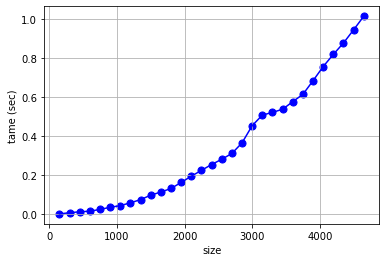

In [21]:
print('\t size\t Tame(sec)')
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[i]))

# график функции
pylab.figure ()
plt.plot(NPI, Tame, c='b')
plt.scatter(NPI, Tame, c='b',s=50)
# параметры графика
xl = plt.xlabel("size");
yl = plt.ylabel("tame (sec)");
plt.grid(True);
plt.show();

# Пример. Последовательный поиск

In [40]:
def dummy_search (a, key):
    n = len(a)
    for i in range(n):
        if a[i] == key:
            return i
    return n

In [41]:
ary = [7,8,1,2,3,4,13,5,1,2,44,5,1]
print(dummy_search (ary, 13))

6


In [45]:
# вероятно чуть более рациональная реализация
def clever_search (a, key):
    n = len(a)
    i=0
    while a[i]!=key:
        i=i+1
    return i

In [46]:
ary2 = [7,8,1,2,3,4,13,5,1,2,44,5,1,44]
print(clever_search (ary2, 13))

6


In [47]:
%timeit dummy_search (ary, 44)
    
%timeit clever_search (ary2, 44)

1.22 µs ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.12 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Упражнение. Поиск в $\pi$

Найдите в дробной части числа $\pi$ порядковый номер каждой цифры начиная с 1 встретившейся количество раз равное её значению (первую единицу, вторую двойку и т.д.)

In [ ]:
npi = 100
PI = [int(i) for i in str(pi.n(npi))[2:]]

a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k = a.copy()

for i in range(npi - 2):
    a[PI[i]] += 1
    if PI[i] == a[PI[i]]:
        k[PI[i]] = i + 1

print(k)

# Домашнее задание (базовое):

# Задание 1.

Найдите в числе $\pi$ номер цифры в дробной части после которой идёт последовательность из:

- шести 9;
- шесть 8;
- шесть 0;
- первых шести цифр;
- семь цифр вашего номера телефона.

In [ ]:
import sympy as sm 
from sympy import *
import numpy as np

npi = 300000
PI = [int(i) for i in str(pi.n(npi))[2:]] 

In [ ]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [9, 9, 9, 9, 9, 9]:
        print(i)
        break

In [ ]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [8, 8, 8, 8, 8, 8]:
        print(i)
        break

In [ ]:
f1 = open("pi.txt", 'r')
npi = 3999998
PIs = f1.readlines()
f1.close()
PI = []
for part in PIs:
    for n in part:
        if n != '.' and n != '\n':
            PI.append(int(n))

In [ ]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [0, 0, 0, 0, 0, 0]:
        print(i)
        break

In [ ]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [1, 2, 3, 4, 5, 6]:
        print(i)
        break

In [ ]:
for i in range(npi - 7):
    if PI[i + 1 : i + 8] == [5,4,6,8,2,7,3]:
        print(i)
        break

# Задание 2. Поиск в отсортированном массиве

Реализуйте алгоритмы сужения области:

- бинарный поиск (https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)
- метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)
- интерполирующий поиск (https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)

(см. лекцию 3 с. 17)

In [ ]:
def binarySearch(S, key):
    l = 0
    r = len(S) - 1
    while r - l > 1:
        m = (r + l) // 2
        if key > S[m]:
            l = m
        elif key < S[m]:
            r = m
        else:
            print('binarySearch:', m)
            return
            # важное пояснение: бинарный поиск не обязан искать первое вхождение, 
            # потому что он с самого начала сравнивает с серединой
    if S[l] == key:
        print('binarySearch:', l)
    elif S[r] == key:
        print('binarySearch:', r)
    else:
        print('binarySearch: not found')

In [ ]:
def goldenCutSearch(S, key):
    phi = 0.5*(1 + 5 ** 0.5)
    a = 0
    b = len(S) - 1
    while b - a >= 1:
        x1 = int(b - (b - a)//phi)
        x2 = int(a + (b - a)//phi)
        A = S[a : x2 + 1]
        B = S[x1 : b + 1]
        if key in A:
            b = x2
        elif key in B:
            a = x1
        else:
            print('goldenCutSearch: not found')
            return
    print('goldenCutSearch:', a)

In [ ]:
def interpolationSearch(S, key):
    l = 0
    r = len(S) - 1
    while S[l] < key < S[r]:
        m = int(l + ((key - S[l]) * (r - l)) / (S[r] - S[l]))
        if key > S[m]:
            l = m + 1
        elif key < S[m]:
            r = m - 1
        else:
            print('interpolationSearch:', m)
            return
    if S[l] == key:
        print('interpolationSearch:', l)
    elif S[r] == key:
        print('interpolationSearch:', r)
    else:
        print('interpolationSearch: not found')

In [ ]:
S = list([7,8,1,2,3,4,13,5,1,2,44,5,1])
S.sort()
print(S)

In [ ]:
M = [1, 3, 5, 7]
print(M)

In [ ]:
K = [1, 2, 3, 4, 5]
print(K)

In [ ]:
U = [12.7, 9.1, 10.0012, 7.8]
U.sort()
print(U)

In [ ]:
try:
    key = float(input('Введите значение ключа: '))
except ValueError:
    print('Вы ввели не число.')

A = list(map(float, input('Введите элементы массива через пробел: ').split()))

A.sort()
print('Отсортированный массив:', A, '\n')

print('Поиск:')
binarySearch(A, key)
goldenCutSearch(A, key)
interpolationSearch(A, key)

# Задание 3.

Сравните производительность алгоритмов из задания 2 на задании 1.

In [ ]:
npi = 1000
PI = [int(i) for i in str(pi.n(npi))[2:]]


In [ ]:
D = {}
i = 0
for PI_i in PI:
    D[i] = PI_i
    i += 1

In [ ]:
PI = list(D.values())

In [ ]:
def dictionarySort(D):
    LOI = [] # list of indexes
    LOI = list(D.keys())
    
    # bubble sort method
    a = list(D.values())
    n = len(a)
    for i in range(n, 0, -1):
        for j in range(1, i):
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                LOI[j - 1], LOI[j] = LOI[j], LOI[j - 1]

    return LOI

In [ ]:
LOI = dictionarySort(D)
print(LOI)

In [21]:
array = list(map(int, input('Введите элементы массива через пробел: ').split()))
sorted = [ str(i) for i in heapSort(array) ]
print('Отсортированный массив: ' + ' '.join(sorted))

Введите элементы массива через пробел:  9 1 5 2


Отсортированный массив: 1 2 5 9


In [23]:
def heapify(arr, n, i):
    largest = i # Initialize largest as root
    l = 2 * i + 1   # left = 2*i + 1
    r = 2 * i + 2   # right = 2*i + 2
    if l < n and arr[i] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] # свап
        heapify(arr, n, largest)

def heapSort(arr):
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] # свап 
        heapify(arr, i, 0)

In [24]:
arr = [12, 11, 13, 5, 6, 7]
heapSort(arr)

In [25]:
arr

[5, 6, 7, 11, 12, 13]

# Домашнее задание (дополнительное):

# Задание "Пирамидальная сортировка"

Напишите программу (функцию) реализующую алгоритм пирамидальной сортировки (https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%80%D0%B0%D0%BC%D0%B8%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0,
https://habr.com/ru/post/221095/,
Алгоритмы. Справочник с примерами на C, C , Java и Python (Хайнеман Дж., и др - 2017) с. 87).

In [27]:
def heapSort(v):
    N = len(v)
    for j in range(N):
        for i in range(N // 2 - j // 2 - 1, -1, -1):
            if 2 * i + 2 <= N - 1 - j:
                if v[2 * i + 1] > v[2 * i + 2]:
                    if v[i] < v[2 * i + 1]:
                        v[i], v[2 * i + 1] = v[2 * i + 1], v[i]
                else:
                    if (v[i] < v[2 * i + 2]):
                        v[i], v[2 * i + 2] = v[2 * i + 2], v[i]
            else:
                if (2 * i + 1 <= N - 1 - j):
                    if (v[i] < v[2 * i + 1]):
                        v[i], v[2 * i + 1] = v[2 * i + 1], v[i]
        v[0], v[N - 1 - j] = v[N - 1 - j], v[0]
    for i in range(N):
        yield v[i] 

In [28]:
array = list(map(int, input('Введите элементы массива через пробел: ').split()))
sorted = [ str(i) for i in heapSort(array) ]
print('Отсортированный массив: ' + ' '.join(sorted))

Введите элементы массива через пробел:  5 7 1 2


Отсортированный массив: 1 2 5 7


In [29]:
def heapify(arr, n, i):
    largest = i # Initialize largest as root
    l = 2 * i + 1   # left = 2*i + 1
    r = 2 * i + 2   # right = 2*i + 2
    if l < n and arr[i] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] # свап
        heapify(arr, n, largest)

def heapSort(arr):
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] # свап 
        heapify(arr, i, 0)

In [30]:
arr = [12, 11, 13, 5, 6, 7]
heapSort(arr)

In [31]:
arr

[5, 6, 7, 11, 12, 13]

# Задание "Малые тела"

Есть база данных малых тел солнечной системы созданная под эгидой Международного астрономического союза. Файл с этой базой можно скачать здесь https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT, а здесь приведено его описание https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html

Отсортируйте эту базу по названию малого тела. Напишите две программы реализующие поиск в отсортированном и неотсартированном массивах. В последнем случае поиск может производиться по любому параметру из таблицы.

In [ ]:
def sortByTitle(arr):
    return arr[2][23] 

filename = input('Введите имя файла MPCORB.DAT): ')
if filename == '':
    filename = 'MPCORB.DAT'

data = []
with open(filename, 'r') as f:
    k = False
    i = 0
    for line in f:
        if '--------' in line:
            k = True
            continue
        if k:
            s = []
            s.append(line[0 : 7])
            s.append(line[8 : 13])
            s.append(float(line[14 : 19]))
            s.append(line[20 : 25])
            s.append(float(line[26 : 35]))
            s.append(float(line[37 : 46]))
            s.append(float(line[48 : 57]))
            s.append(float(line[59 : 68]))
            s.append(float(line[70 : 79]))
            s.append(float(line[80 : 91]))
            s.append(float(line[92 : 103]))
            s.append(line[105])
            s.append(line[107 : 116])
            s.append(int(line[117 : 122]))
            s.append(int(line[123 : 126]))
            s.append(int(line[127 : 131]))
            s.append(line[131])
            s.append(int(line[132 : 136]))
            s.append(line[137 : 141])
            s.append(line[142 : 145])
            s.append(line[146 : 149])
            s.append(line[150 : 160])
            s.append(line[161 : 165])
            s.append(line[166 : 194]) # тот самый кусок строки с названием объекта
            s.append(line[194 : 202])
            data.append([i, line, s])
            i += 1
    print('Прочитано и записано строк: %i' % i)

sorted_data = sorted(data, key=sortByTitle)

In [ ]:
print('Прочитано и записано строк: %i' % i)


In [ ]:
sorted_data = sorted(data, key=sortByTitle)
print('Сортировка завершена.')

In [ ]:
search_str = input('Сделайте поиск: ')
for i in range(len(data)):
    if search_str in data[i][2][23]:
        print('Совпадение в элементе %i несортированного массива. ' % i +
              'Планета - %s' % str(data[i][2][23]))
        print(data[i][1])

In [ ]:
print(data[931][2][1], type(data[931][2][1]))

In [ ]:
j = int(input('Введите один из 25 индексов данных (целое число от 1 до 25) ' +
              '(подробнее: ): ')) - 1
search_str = input('Введите строку поиска: ')
selection = []
for i in range(len(sorted_data)):
    if type(sorted_data[i][2][j]) == type(str):
        if search_str in sorted_data[i][2][j]:
            print('Совпадение в элементе %i несортированного массива. ' % i +
                  'Значение - %s' % str(sorted_data[i][2][j]))
            print(sorted_data[i][1])
            selection.append(sorted_data[i])
    else:
        search_str = float(search_str)
        if search_str == sorted_data[i][2][j]:
            print('Совпадение в элементе %i несортированного массива. ' % i +
                  'Значение - %f' % float(sorted_data[i][2][j]))
            print(sorted_data[i][1])
            selection.append(sorted_data[i])